In [1]:
import sys
sys.path.append('D:/Learn/git/supervised-learning/model_bin')  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  as lrsk
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import linear_regression as lr

In [12]:
raw_data=pd.read_csv('../data/raw_data.csv')
#features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features=['INDUS', 'RM','TAX', 'PTRATIO', 'LSTAT']
target=['MEDV']
X=raw_data[features]
y=raw_data[target]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,shuffle=True,random_state=52)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

In [13]:
alpha=0.5e-3
epoch=2500
theta_initial=np.zeros(((X_train.shape[1]),))
b_initial=0


In [14]:
theta_final,b_final,cost_hist=lr.gradient_descent(X_train,y_train,theta_initial,b_initial,alpha,epoch)

iteration    0: Cost  0.09088 
iteration  250: Cost  0.06329 
iteration  500: Cost  0.04698 
iteration  750: Cost  0.03726 
iteration 1000: Cost  0.03140 
iteration 1250: Cost  0.02779 
iteration 1500: Cost  0.02550 
iteration 1750: Cost  0.02399 
iteration 2000: Cost  0.02293 
iteration 2250: Cost  0.02215 


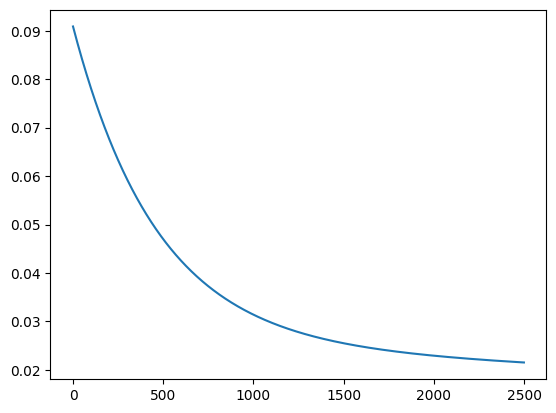

In [15]:
plt.plot(cost_hist)

In [16]:
lr.val_scores(X_train,y_train,theta_final,b_final)

0.021531986031901817

In [17]:
lr.val_scores(X_test,y_test,theta_final,b_final)

0.0320027956626553

In [8]:
lr.val_scores(X_val,y_val,theta_final,b_final)

0.03007967540810968

In [19]:
y_pred=lr.hyp(X_test, theta_final, b_final)

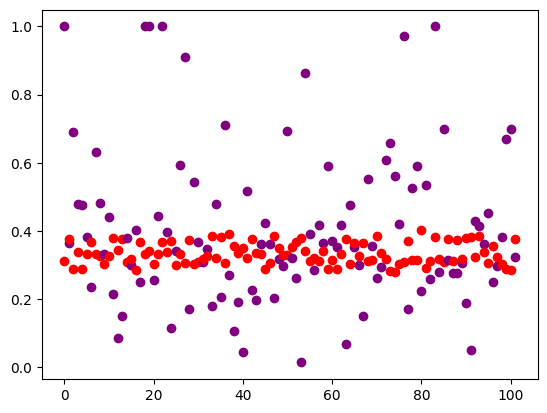

In [20]:
y_test_np=y_test.to_numpy()
for i in range (y_test_np.shape[0]):
    plt.scatter(i,y_test_np[i],c='purple')
    plt.scatter(i,y_pred[i],c='red')



    

In [11]:
r2_score(y_test,y_pred)

0.023714554321520476